In [7]:
 %reset

Nothing done.


# Dependencies and Imports

# Subject-specific information
make sure to choose the kernel located at python.exe. Local kernel could let the output be printed twice (This has apart form the visuals no further consequences)


The variables inserted in this first widget will be used for every session-specific JSON initialized in the upcoming second widget. There is no separate JSON-file saved with only these data.

# Session-specific and recording-specific information


Select Poly5-file to convert and add additional session info. After closing one session, json-file will be saved, and a window for a next session will pop up.


Files are currently saved in folder where this script is stored.

In [4]:
"""
subject 
session + hardware + space + UPDRS + electrode localizations
task  + run + channel names + reference + stimsettings + time of acquisition

1 json file per recording

To Do: electrode size
"""

'\nsubject \nsession + hardware + space + UPDRS + electrode localizations\ntask  + run + channel names + reference + stimsettings + time of acquisition\n\n1 json file per recording\n\nTo Do: electrode size\n'

In [7]:

import TMSiSDK
from TMSiSDK import *
from TMSiSDK.file_readers import Poly5Reader
file = r"C:\Users\Jonathan\Documents\DATA\PROJECT_BERLIN_Conversion\sourcedata\sub-010\ses-EcogLfpMedOff01\532LO56_MedOff1_Rest_StimOff_1 - 20220207T113556\532LO56_MedOff1_Rest_StimOff_1-20220207T113556.DATA.Poly5"
data = Poly5Reader(file)

Reading file  C:\Users\Jonathan\Documents\DATA\PROJECT_BERLIN_Conversion\sourcedata\sub-010\ses-EcogLfpMedOff01\532LO56_MedOff1_Rest_StimOff_1 - 20220207T113556\532LO56_MedOff1_Rest_StimOff_1-20220207T113556.DATA.Poly5
	 Number of samples:  1225770 
	 Number of channels:  39 
	 Sample rate: 4000 Hz
Done reading data.


In [38]:
data.num_samples

1225770

In [39]:
data.num_channels

39

In [40]:
data.sample_rate

4000

In [31]:
mne.io.Raw(data)

Opening raw data file <TMSiSDK.file_readers.poly5reader.Poly5Reader object at 0x000001ED8E735790>...


TypeError: fname must be an instance of path-like, got <class 'TMSiSDK.file_readers.poly5reader.Poly5Reader'> instead

In [6]:
[ch._Channel__name for ch in data.channels]

ch_names = [ch._Channel__name for ch in data.channels]

AttributeError: 'numpy.ndarray' object has no attribute 'channels'

In [45]:
d = mne.io.read_raw( data.readAll)

TypeError: expected str, bytes or os.PathLike object, not bool

In [29]:
from  TMSiSDK import *

from TMSiSDK.file_writer import FileWriter, FileFormat

fil = FileWriter(FileFormat.poly5, file)

fil.open

TypeError: open() missing 1 required positional argument: 'device'

In [46]:
mne.io.RawArray(data)

TypeError: __init__() missing 1 required positional argument: 'info'

In [62]:
from TMSiSDK.device import DeviceInterfaceType, ChannelType, DeviceState

tmsi_device.initialize()

    # Create the device object to interface with the SAGA-system.
dev = tmsi_device.create(tmsi_device.DeviceType.saga, DeviceInterfaceType.docked, DeviceInterfaceType.usb)


NameError: name 'tmsi_device' is not defined

In [63]:
TMSiSDK.get_config(data

TypeError: unsupported operand type(s) for +: 'Poly5Reader' and 'str'

In [65]:
data._readSignalDescription(data,)
ch = data.channels
print(ch)

AttributeError: 'Poly5Reader' object has no attribute 'read'

In [69]:
data._readSignalDescription(data, data.f

<_io.BufferedReader name='C:\\Users\\Jonathan\\Documents\\DATA\\PROJECT_BERLIN_Conversion\\sourcedata\\sub-010\\ses-EcogLfpMedOff01\\532LO56_MedOff1_Rest_StimOff_1 - 20220207T113556\\532LO56_MedOff1_Rest_StimOff_1-20220207T113556.DATA.Poly5'>

In [10]:
dataraw = np.array(data.samples)
data.sample_rate

4000

In [13]:
info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])

raw = mne.io.RawArray(data.samples, info)

Creating RawArray with float64 data, n_channels=39, n_times=1225770
    Range : 0 ... 1225769 =      0.000 ...   306.442 secs
Ready.


<ipython-input-13-17d0812adcb0>:1: RuntimeWarning: 1 channel names are too long, have been truncated to 15 characters:
['Counter 2power24']
  info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])
<ipython-input-13-17d0812adcb0>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Y', 'Z'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])


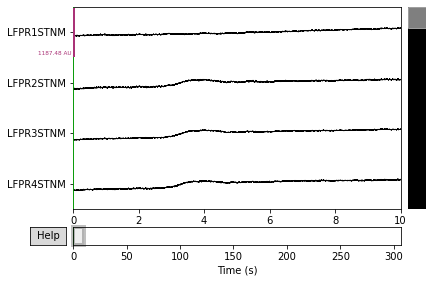

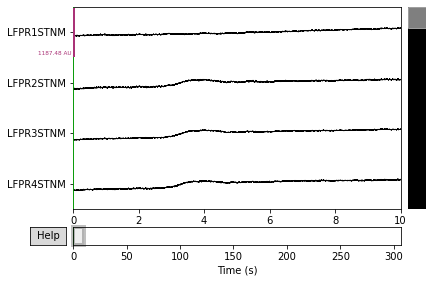

In [15]:
raw.plot(n_channels=4, title='Data from arrays',
         show=True, block=True)

Creating RawArray with float64 data, n_channels=4, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


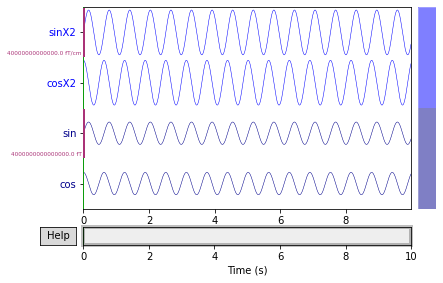

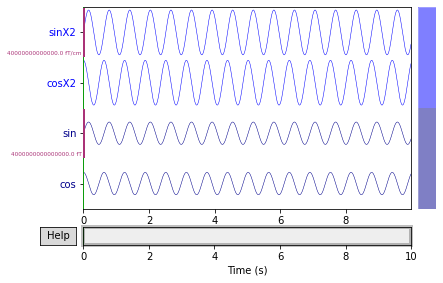

In [49]:



sfreq = 1000  # Sampling frequency
times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)

sin = np.sin(times * 10)  # Multiplied by 10 for shorter phase
cos = np.cos(times * 10)
sinX2 = sin * 2
cosX2 = cos * 2

# Numpy array of size 4 X 10000.
data = np.array(data)

# Definition of channel types and names.
ch_types = ['mag', 'mag', 'grad', 'grad']
ch_names = ['sin', 'cos', 'sinX2', 'cosX2']


# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

raw = mne.io.RawArray(data, info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.
scalings = {'mag': 2, 'grad': 2}

raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
         show=True, block=True)